# CPSC 330 Lecture 1

Instructor: Mike Gelbart

Outline:

- About this course (20 min)
- Python requirements/resources (10 min)
- Survey + Break (10 min)
- Introducing our first dataset (5 min)
- Introduction to supervised learning (10 min)
- `DummyClassifier` (5 min)
- Activity (15 min)

In [2]:
import pandas as pd
from sklearn.dummy import DummyClassifier

## About this course (30 min)

#### Most important link

https://github.com/UBC-CS/cpsc330

Please read everything on there!


#### CPSC 330 vs. 340

https://github.com/UBC-CS/cpsc330/blob/master/docs/330_vs_340.md

TLDR:

- CPSC 340 has many prerequisites 
- CPSC 340 goes deeper but has a more narrow scope
- I think CPSC 330 will be more useful if you just plan to apply basic ML

#### Registration, waitlist and prerequisites

https://github.com/UBC-CS/cpsc330/blob/master/docs/course_info.md#registration

Please do not contact me about these issues before reading everything in this document. Even then, I am very unlikely to be able to help with registration, waitlist or prerequisite issues.

#### Course format

- Weekly assignments due Saturday at 6pm.
- First assignment due **this Saturday**, Sep 12th, at 6pm (you should have hw repos already).
- Students on the waitlist should complete the assignment (otherwise you will get 0 if/when you join the course).
- Homework can be done in partners (except the first one).
- Weekly tutorials (optional) run by the TAs.
- One midterm, one final.

#### Code of conduct

- Our main forum for getting help will be [Piazza](https://piazza.com/class/kb2e6nwu3uj23).
- Please read the entire [document about asking for help](https://github.com/UBC-CS/cpsc330/blob/master/docs/asking_for_help.md).

TLDR: be nice.

#### Grades

The grading breakdown is [here](https://github.com/UBC-CS/cpsc330/blob/master/docs/course_info.md#grading). The policy on challenging grades is [here](https://github.com/UBC-CS/cpsc330/blob/master/docs/grades.md).

#### Course tools: Python, git, GitHub

- Instructions on course page for [Python](https://github.com/UBC-CS/cpsc330/blob/master/docs/python_info.md) and [git](https://github.com/UBC-CS/cpsc330/blob/master/docs/git_installation.md).

#### Lecture and homework format: Jupyter notebooks

- This document is a [Jupyter notebook](https://jupyter.org/), with file extension `.ipynb`.
- Jupyter notebooks are edited with one of two web apps: Jupyter notebook (older) or Jupyter lab (newer).
  - The Python install instructions (above) suggest installing Anaconda, which should include these applications.
  - I am using Jupyter lab, some things might not work with the Jupyter notebook application.
- Jupyter notebooks contain a mix of code, code output, markdown-formatted text (including LaTeX equations), and more.
- When you open a Jupyter notebook in one of these apps, the document is "live", meaning you can run the code.
- For example:

In [3]:
1+1

2

In [4]:
x = [1,2,3]
x[0] = 9999
x

[9999, 2, 3]

- By default, Jupyter prints out the result of the last line of code, so you don't need as many `print` statements.
- In addition to the "live" notebooks, Jupyter notebooks can be statically rendered in the web browser, e.g. [this](https://github.com/UBC-CS/cpsc330/blob/master/lectures/01_intro.ipynb).
  - This can be convenient for quick read-only access, without needing to launch the Jupyter notebook/lab application.
  - But you need to launch the app properly to interact with the notebooks.



#### Lecture style

- Lots of live coding in Jupyter.
- All materials will be posted, no need to photograph anything.

#### About me

- PhD in machine learning, have been teaching at UBC since then (no more research).
- Doing some consulting for startups and for a venture capital fund.
- Part of the team that created the UBC Master of Data Science (MDS), Co-Director of MDS since 2018.
- Have taught CPSC 340 several times.
- Designed this course, this is my second time teaching it.
- Please call me Mike!

## Python requirements/resources (10 min)

#### Python knowledge you'll need

- Basic Python programming
- Numpy
- Pandas
- Matplotlib
- Sparse matrices


#### Python resources

- We do not have time to teach all the Python we need.
- Some of you will already know Python, others won't.
- Homework 1 is all about Python.

https://github.com/UBC-CS/cpsc330/blob/master/docs/resources.md

## Survey + Break (10 min)

- We will try to take a 5-minute break half way through every class.
- Today, please complete the entry survey on Qualtrics [here](https://ubc.ca1.qualtrics.com/jfe/form/SV_6RI7xxxTSlWqeXP).

## Introducing our first data set (5 min)

- This dataset contains longtitude and latitude data for 400 cities in the US
- Each city is labelled as `red` or `blue` depending on how they voted in the 2012 election.
- The cities data was sampled from (http://simplemaps.com/static/demos/resources/us-cities/cities.csv). The election information was collected from Wikipedia.

This dataset contains votes (red or blue) for various cities (?) in some past U.S. election.

In [5]:
df = pd.read_csv('data/cities_USA.csv', index_col=0)
df

,lon,lat,vote
1,-80.162475,25.692104,blue
2,-80.214360,25.944083,blue
3,-80.094133,26.234314,blue
4,-80.248086,26.291902,blue
5,-81.789963,26.348035,blue
...,...,...,...
396,-97.460476,48.225094,red
397,-96.551116,48.591592,blue
398,-166.519855,53.887114,red
399,-163.733617,67.665859,red


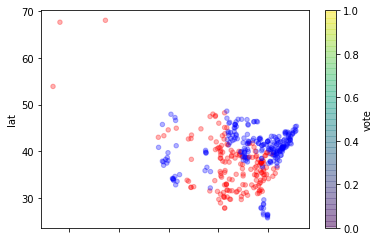

In [8]:
df.plot.scatter(x="lon", y="lat", c="vote", alpha=0.3);

## Introduction to supervised learning (10 min)

- In supervised learning, we have a set of features, $X$, with associated targets, $y$
- We wish to find a model function that relates $X$ to $y$
- Then use that model function to predict future observations.

What are $X$ and $y$ here?

In [10]:
X = df[["lon", "lat"]]
X

,lon,lat
1,-80.162475,25.692104
2,-80.214360,25.944083
3,-80.094133,26.234314
4,-80.248086,26.291902
5,-81.789963,26.348035
...,...,...
396,-97.460476,48.225094
397,-96.551116,48.591592
398,-166.519855,53.887114
399,-163.733617,67.665859


In [16]:
y = df["vote"]
y

1      blue
2      blue
3      blue
4      blue
5      blue
       ... 
396     red
397    blue
398     red
399     red
400     red
Name: vote, Length: 400, dtype: object

- Note that $X$ is a 2-dimensional array, whereas $y$ is 1-dimensional.

In [17]:
X.shape

(400, 2)

In [18]:
X.ndim

2

In [19]:
y.shape

(400,)

In [20]:
y.ndim

1

#### Classification vs Regression
- Variables can be characterized as quantitative/numeric or qualitative/categorical
- **Classification** = prediction of a categorical target (e.g. red vs. blue)
- **Regression** = prediction of a quantitative target (coming later in this course)

<img src='img/regr.png' width="750">

There is also _unsupervised learning_, which we'll talk about (very briefly) later in the course.

- For ML we typically work with "tabular data".
- Rows are examples.
- Columns are features (the last column is typically the target).

### Terminology
- You will see a lot of variable terminology in machine learning and statistics
- See the MDS terminology resource [here](https://ubc-mds.github.io/resources_pages/terminology/).

Of particular note:

- **examples** = rows = samples = records = instances (usually denoted by $n$)
- **features** = inputs = predictors = explanatory variables = regressors = independent variables = covariates (usually denoted by $d$)
- **targets** = outputs = outcomes = response variable = dependent variable = labels (if categorical).
- **training** = learning = fitting

## `DummyClassifier` (5 min)

- Rule of thumb: start simple.
- Simplest classifier: [`DummyClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html).

In [ ]:
# df = pd.read_csv('data/cities_USA.csv', index_col=0)
# X = df.drop(columns=['vote'])
# y = df['vote']
# X_train, X_test, y_train, y_test = train_test_split(X,
#                                                     y,
#                                                     test_size=0.5,
#                                                     random_state=123)

In [129]:
from sklearn.dummy import DummyClassifier

In [130]:
dc = DummyClassifier(strategy="prior")
dc.fit(X_train, y_train);

In [131]:
show_scores(dc, X_train, y_train, X_test, y_test)

Training error: 0.239
Test     error: 0.246


- What is this doing?
- Just picking the most popular class:

In [132]:
y_train.value_counts()

<=50K    19810
>50K      6238
Name: income, dtype: int64

In [133]:
y_train.value_counts()/len(y_train)

<=50K    0.760519
>50K     0.239481
Name: income, dtype: float64

"<=50K" is more common, so just predict "<=50K" everywhere:

In [134]:
dc.predict(X_test)

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype='<U5')

In [135]:
test_err = 1 - np.sum(y_test=="<=50K")/len(y_test)
test_err

0.24612313833870725

- Earlier we got 15% test error. Is that good?
- Well, it's better than this baseline at least!

## Activity (15 min)

### Classification vs Regression questions

Which of these are examples of classification? (To answer on Piazza)

1. Predicting the price of a house based on features like number of rooms.
2. Predicting if a house will sell or not based on features like the price of the house, number of rooms, etc.
3. Predicting your grade based on past grades.
4. Predicting whether you should bicycle to work tomorrow based on the weather forecast.
